<a href="https://colab.research.google.com/github/gotjd709/AI_class_KSA/blob/main/20.12.18.Fri.Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
dataset = [['f', 'a', 'c', 'd', 'g', 'i', 'm', 'p'],
 ['a', 'b', 'c', 'f', 'l', 'm', 'o'],
 ['b', 'f', 'h', 'j', 'o'],
 ['b', 'c', 'k', 's', 'p'],
 ['a', 'f', 'c', 'e', 'l', 'p', 'm', 'n']]

In [2]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary


array([[ True, False,  True,  True, False,  True,  True, False,  True,
        False, False, False,  True, False, False,  True, False],
       [ True,  True,  True, False, False,  True, False, False, False,
        False, False,  True,  True, False,  True, False, False],
       [False,  True, False, False, False,  True, False,  True, False,
         True, False, False, False, False,  True, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False,  True,  True],
       [ True, False,  True, False,  True,  True, False, False, False,
        False, False,  True,  True,  True, False,  True, False]])

In [3]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,s
0,True,False,True,True,False,True,True,False,True,False,False,False,True,False,False,True,False
1,True,True,True,False,False,True,False,False,False,False,False,True,True,False,True,False,False
2,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
4,True,False,True,False,True,True,False,False,False,False,False,True,True,True,False,True,False


In [4]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(a)
1,0.6,(b)
2,0.8,(c)
3,0.8,(f)
4,0.6,(m)
5,0.6,(p)
6,0.6,"(a, c)"
7,0.6,"(f, a)"
8,0.6,"(a, m)"
9,0.6,"(f, c)"


In [6]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
1,(a),(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf
2,(a),(m),0.6,0.6,0.6,1.0,1.666667,0.24,inf
3,(m),(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(m),(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
5,(p),(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
6,(m),(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf
7,"(f, a)",(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf
8,"(f, c)",(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf
9,"(a, c)",(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf


In [8]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) &
 (rules['confidence'] > 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
7,"(f, a)",(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf,2
8,"(f, c)",(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf,2
9,"(a, c)",(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf,2
11,"(a, m)",(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf,2
12,"(a, c)",(m),0.6,0.6,0.6,1.0,1.666667,0.24,inf,2
13,"(m, c)",(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf,2
16,"(f, a)",(m),0.6,0.6,0.6,1.0,1.666667,0.24,inf,2
17,"(f, m)",(a),0.6,0.6,0.6,1.0,1.666667,0.24,inf,2
18,"(a, m)",(f),0.6,0.8,0.6,1.0,1.250000,0.12,inf,2
21,"(f, m)",(c),0.6,0.8,0.6,1.0,1.250000,0.12,inf,2


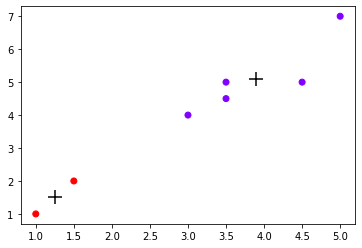

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5], [3.5, 4.5]])
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black',
marker="+", s=200)
plt.show()

In [9]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5], [3.5, 4.5]])
kmeans = KMeans(n_clusters=2).fit(X)
print("Labels: ", kmeans.labels_)
print("Cluster Centers: ", kmeans.cluster_centers_)
print("Predict Values: ", kmeans.predict([[1, 1]]))

Labels:  [0 0 1 1 1 1 1]
Cluster Centers:  [[1.25 1.5 ]
 [3.9  5.1 ]]
Predict Values:  [0]
